## Edible or Poisonous: Mushroom Species Identification using Machine Learning

In this project, the goal was to develop a robust machine learning model capable of accurately classifying mushrooms into their respective species, particularly distinguishing between edible and poisonous varieties. The dataset used comprised various features such as cap color, odor, habitat, and more, collected from different mushroom samples.

Multiple machine learning algorithms — decision trees, random forests, SVMs — were explored to identify the most effective model for classification. 
Validation methods like cross-validation and hyperparameter tuning were employed to refine and assess model performance, ensuring robustness and minimizing potential overfitting. The model's efficacy was evaluated using diverse metrics such as accuracy, precision, recall, and F1-score.Additionally, visualization tools like confusion matrices, ROC curves, and precision-recall curves were utilized to provide a comprehensive overview of the model's capabilities.

Ultimately, this project aimed to create a reliable machine learning model for preliminary mushroom species classification, emphasizing the responsible application of technology in domains crucial for human safety and well-being.


In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, OneClassSVM, NuSVC
from sklearn.decomposition import PCA
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from scipy.stats import randint

### Loading Data and Getting Data Information

In this project we will analyze dataset taken from [Kaggle](https://www.kaggle.com/datasets/uciml/mushroom-classification) 
The dataset description from Kaggle:
> This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family
> Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely
> poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. This dataset was originally donated to > the UCI Machine Learning repository.

Now lets read the data! 

In [270]:
data = pd.read_csv("data/mushrooms.csv")

In [271]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [272]:
data.shape

(8124, 23)

In [273]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

By using .dtypes, we established that all features are of type 'object'.

Attribute Information from [Kaggle](https://www.kaggle.com/datasets/uciml/mushroom-classification)

> classes: edible=e, poisonous=p

> cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

> cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

> cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

> bruises: bruises=t,no=f

> odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

> gill-attachment: attached=a,descending=d,free=f,notched=n

> gill-spacing: close=c,crowded=w,distant=d

> gill-size: broad=b,narrow=n

> gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

> stalk-shape: enlarging=e,tapering=t

> stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

> stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

> stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

> stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

> stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

> veil-type: partial=p,universal=u

> veil-color: brown=n,orange=o,white=w,yellow=y

> ring-number: none=n,one=o,two=t

> ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

> spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

> population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

> habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [274]:
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [275]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [276]:
data['stalk-root'] = data['stalk-root'].apply(lambda x: 'm' if '?' in x else x)

Although we don't have null-valued features, there's one instance: thе feature 'stalk-root' contains a value of '?', which we replace with 'm' to denote missing information.

### Data Visualisation

In the next section data is visualized using boxplots and countplots to analyze features. Boxplots revealed distributions and outliers, capturing feature tendencies. Countplots showcased categorical variable frequencies, giving insights into their distribution relative to both classes. These visuals provided a comprehensive overview for informed decision-making.

In [277]:
selected_columns_for_eda = data.loc[:, ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-color', 'stalk-shape', 'stalk-root', 'ring-number', 'population', 'habitat']] 

In [278]:
custom_palette = ['#FF1493', '#4169E1']

In [279]:
def count_plot_feature_vs_class(features: list):
    for feature in features:
        plt.figure(figsize=(8, 6))
        count_plot = sns.countplot(x=data[feature], hue='class', data=data, palette=custom_palette)
        
        for plot_container in count_plot.containers:
            count_plot.bar_label(plot_container, label_type='edge', color='black')
        
        plt.title(f'{feature} vs. Mushroom Class', fontsize=14, fontweight='bold', color='green')
        plt.xlabel(feature, fontsize=12, fontweight='bold', color='green')
        plt.ylabel('Count', fontsize=12, fontweight='bold', color='green')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        plt.close()

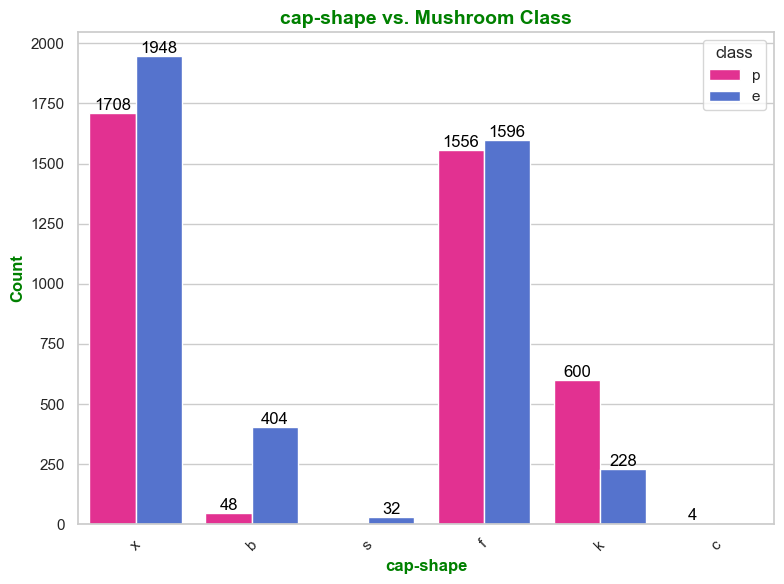

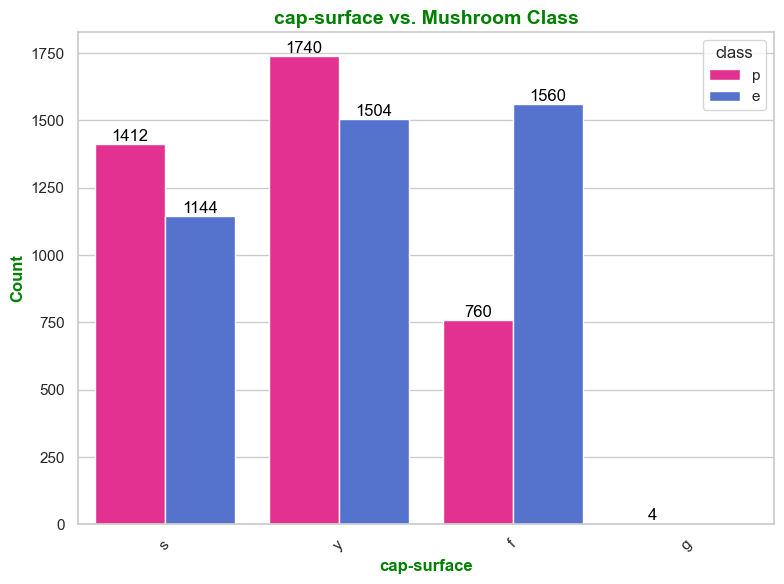

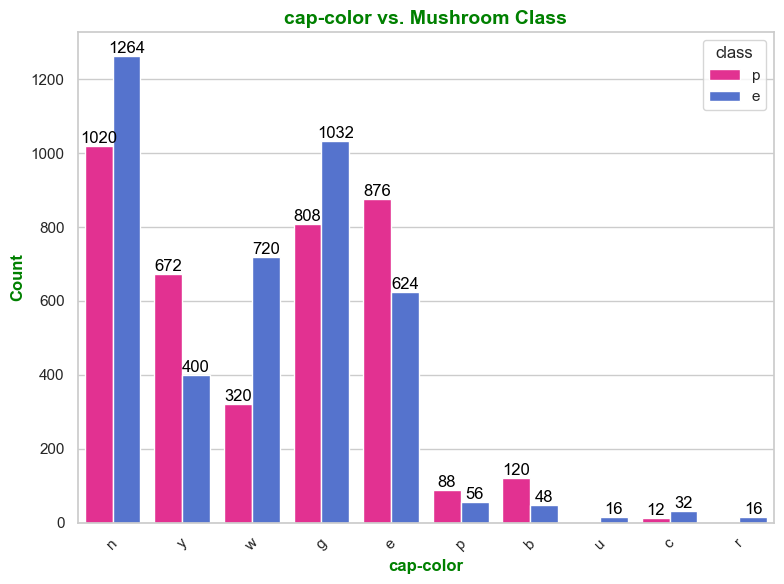

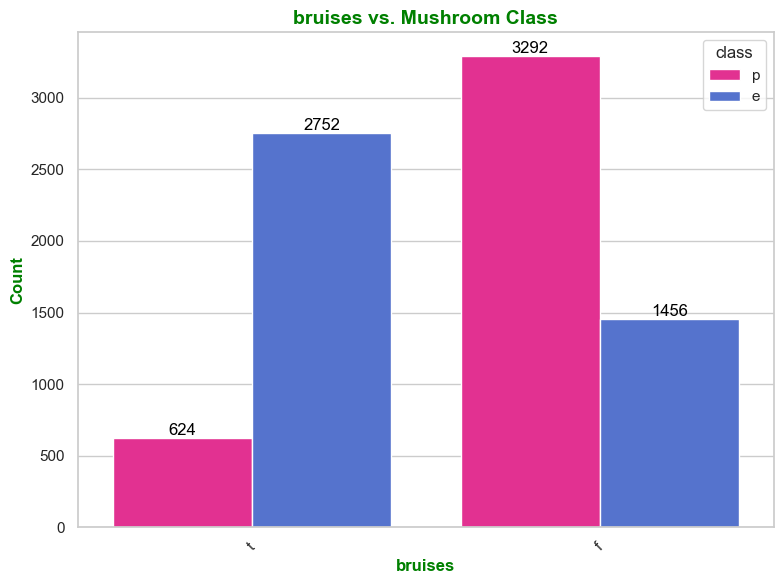

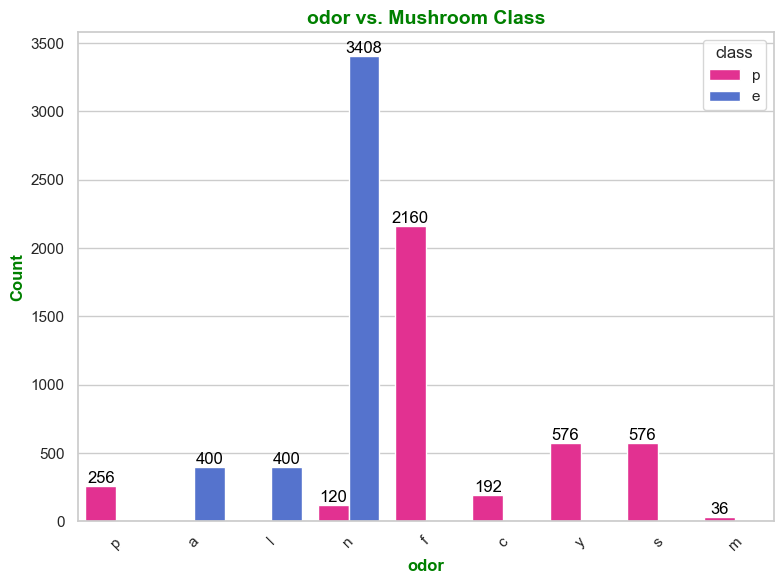

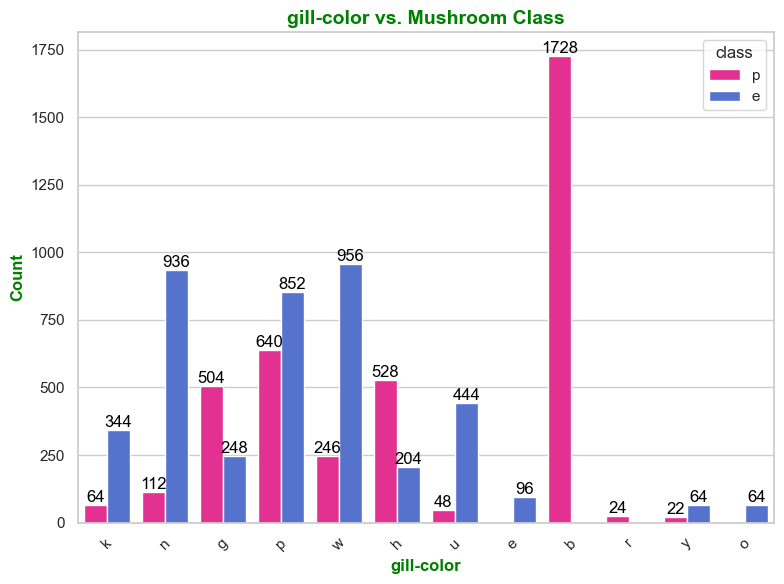

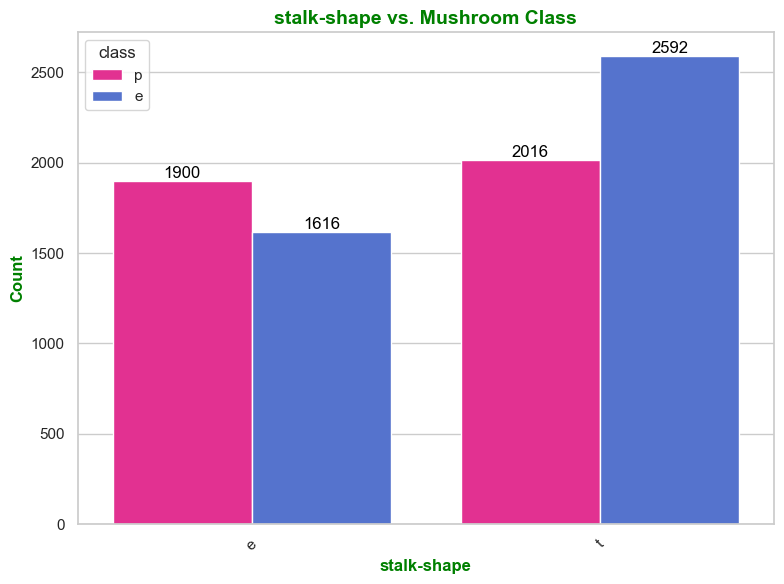

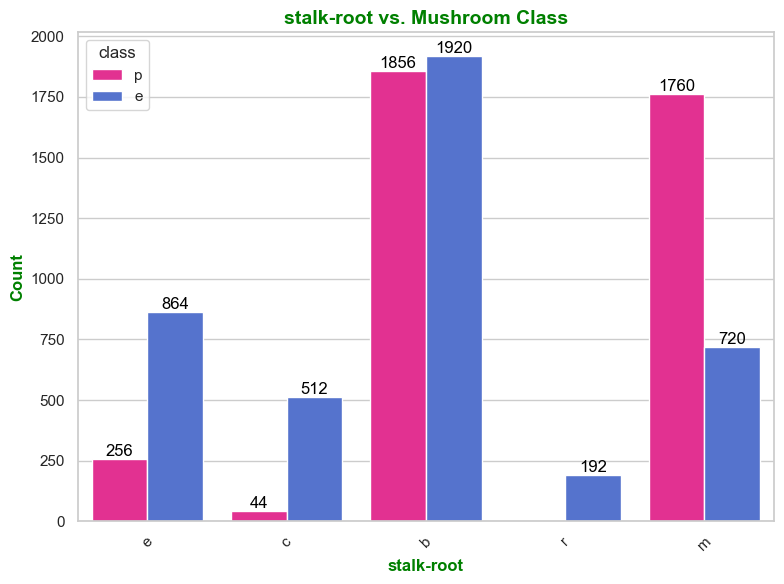

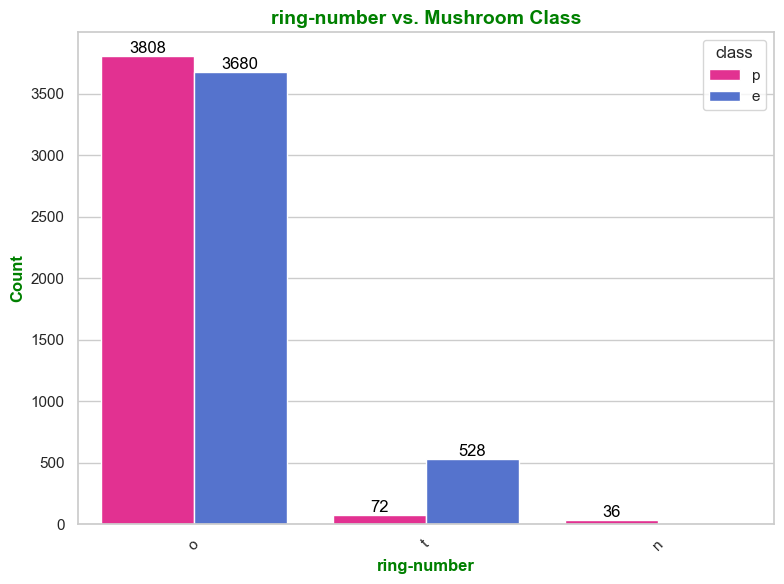

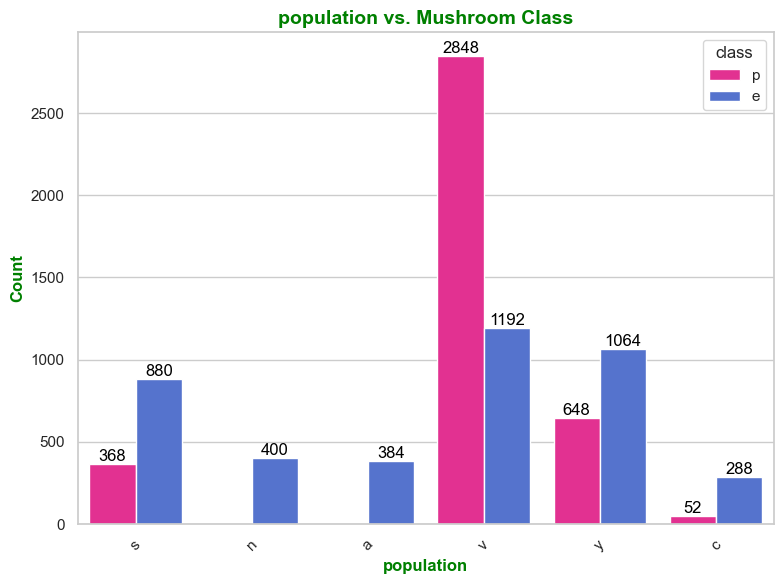

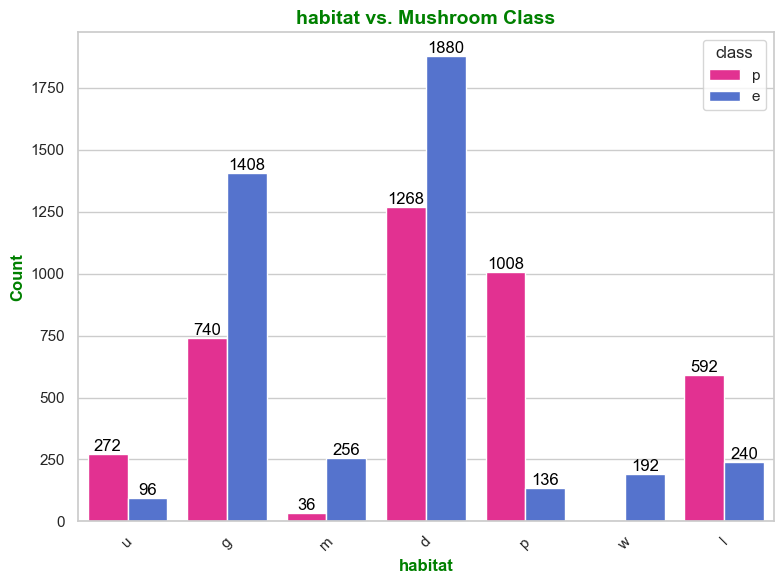

In [280]:
count_plot_feature_vs_class(features=selected_columns_for_eda)

In [281]:
def box_plot_feature_vs_class(features: list):
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    
    custom_colors = {'e': '#4169E1', 'p': '#FF1493'}
    
    for column in features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='class', hue='class', y=column, data=data, palette=custom_colors, legend=False)
        plt.title(f"Box Plot of {column} by Class")
        plt.xlabel("Class")
        plt.ylabel(column)
        plt.show()

<Figure size 1000x600 with 0 Axes>

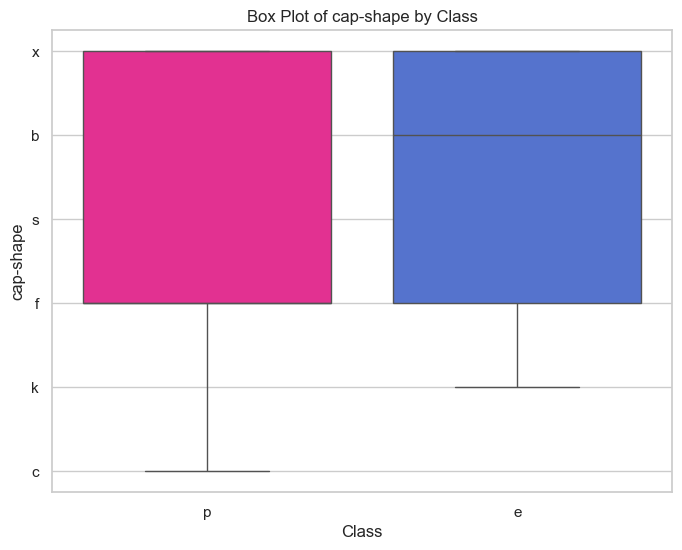

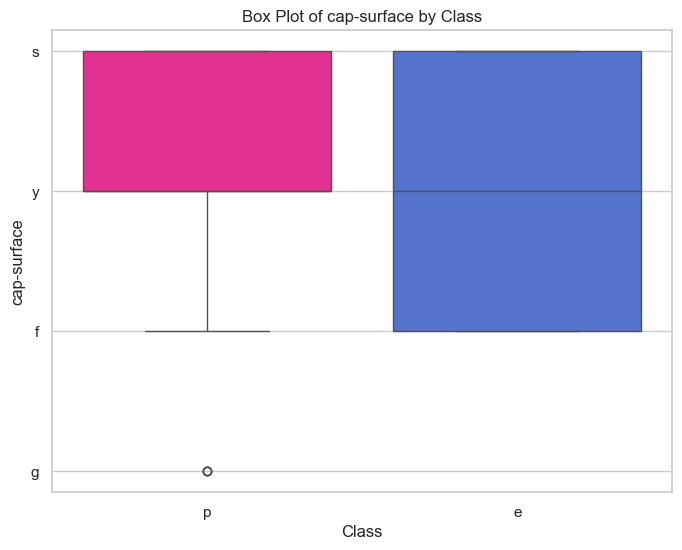

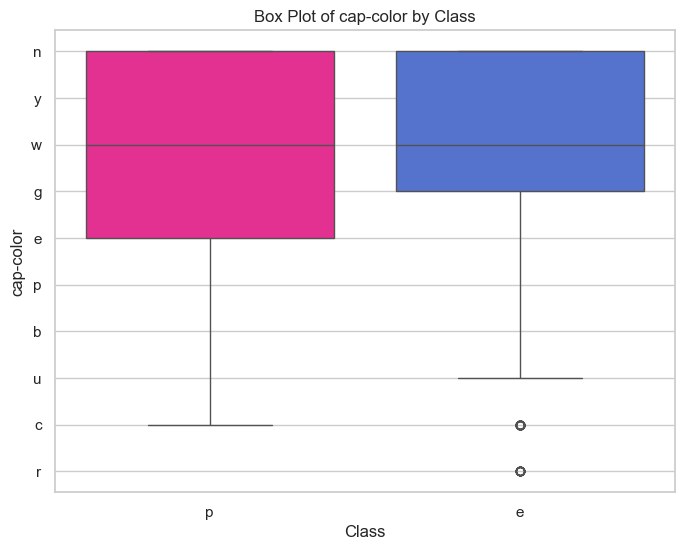

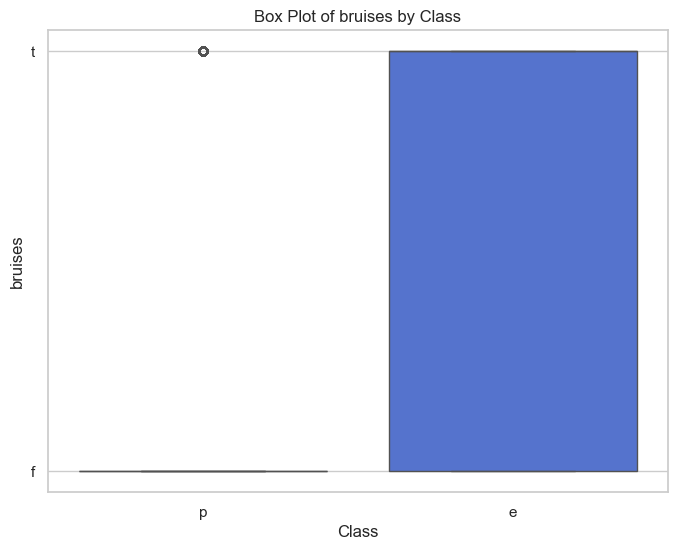

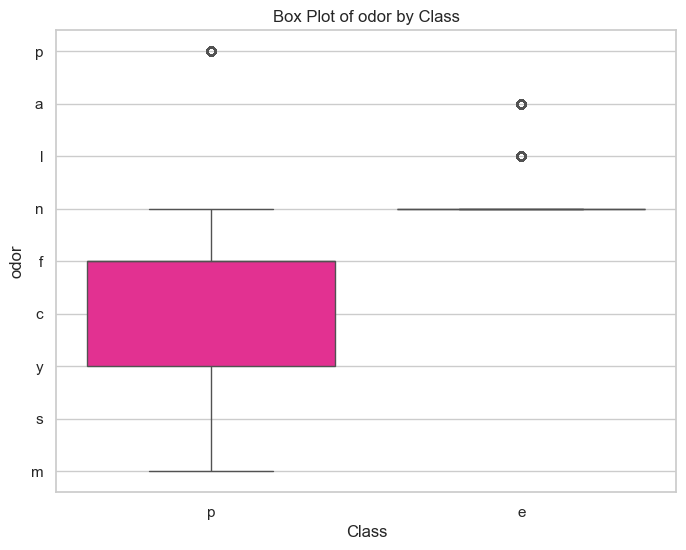

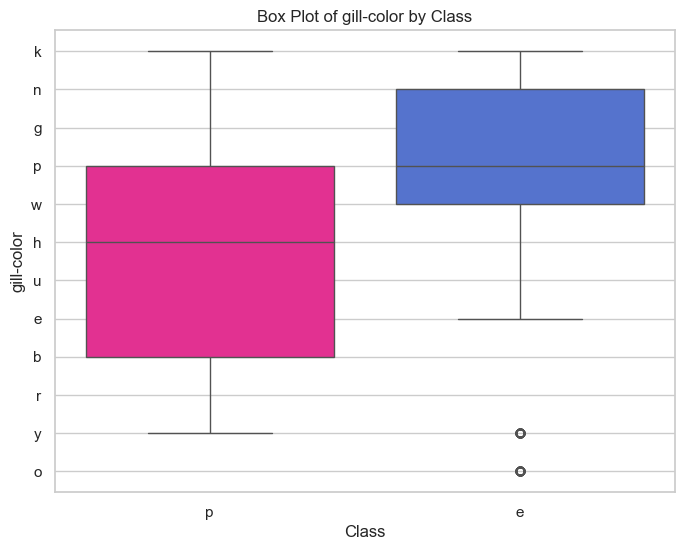

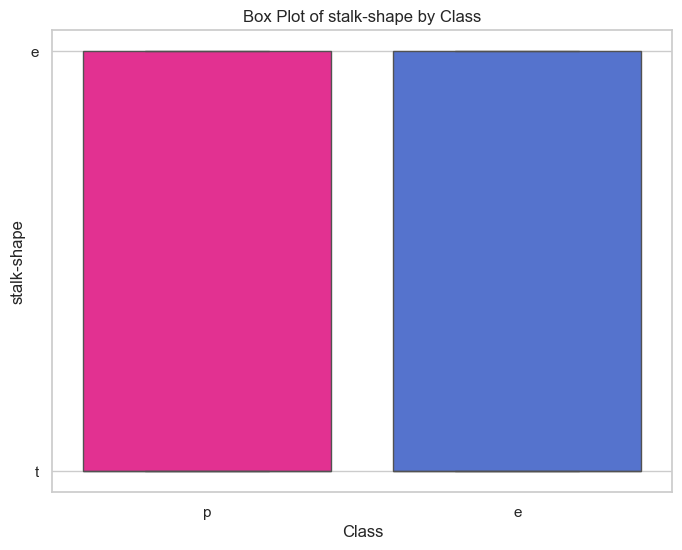

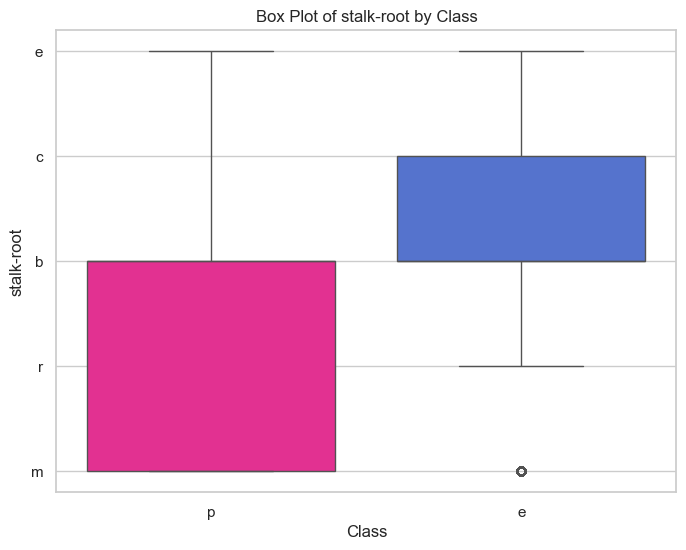

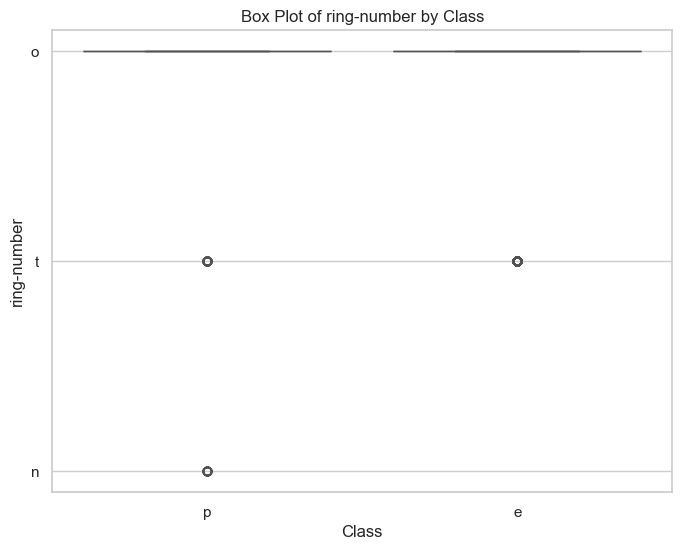

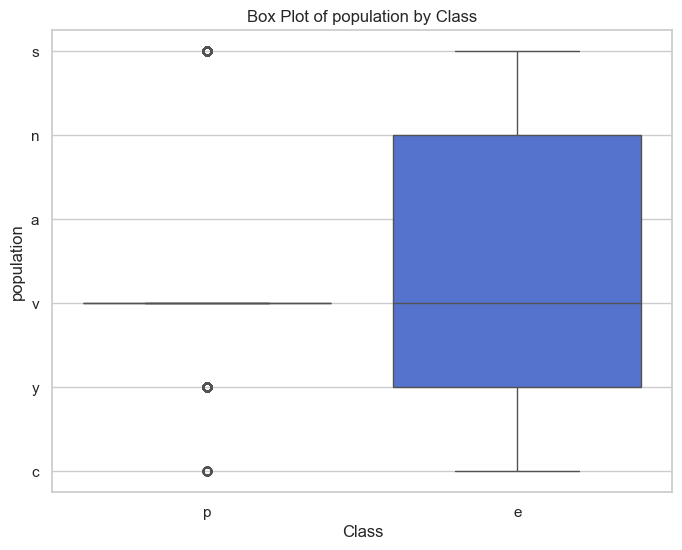

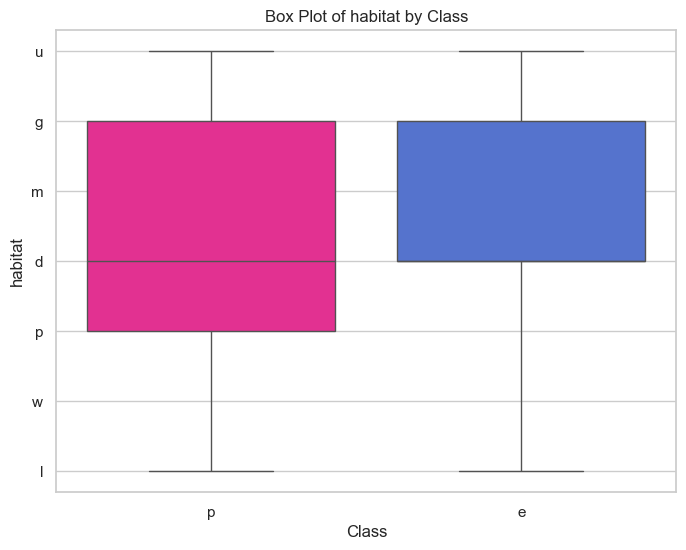

In [282]:
box_plot_feature_vs_class(features=selected_columns_for_eda)

## Feature Engineering

In the following lines of code, I removed certain values from the categorical features. Eliminating rare values from a categorical feature in machine learning can improve model performance by decreasing noise and overfitting, directing the model's focus toward more common and informative categories. This practice enhances the model's robustness and predictive accuracy by prioritizing significant and representative data.

In [283]:
def handle_non_standard_values(value: str, standard_values: list):
    if value not in standard_values:
        return 'Others'
    return value

In [284]:
data['cap-shape'].value_counts()

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

In [285]:
data['cap-shape'] = data['cap-shape'].apply(lambda x: handle_non_standard_values(x, ['x', 'f', 'k']))

In [286]:
data['cap-shape'].value_counts()

cap-shape
x         3656
f         3152
k          828
Others     488
Name: count, dtype: int64

In [287]:
data['cap-surface'].value_counts()

cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

In [288]:
data['cap-surface'] = data['cap-surface'].apply(lambda x: handle_non_standard_values(x, ['y', 's']))

In [289]:
data['cap-surface'].value_counts()

cap-surface
y         3244
s         2556
Others    2324
Name: count, dtype: int64

In [290]:
data['cap-color'].value_counts()

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

In [291]:
data['cap-color'] = data['cap-color'].apply(lambda x: handle_non_standard_values(x, ['n', 'g', 'e', 'y', 'w']))

In [292]:
data['cap-color'].value_counts()

cap-color
n         2284
g         1840
e         1500
y         1072
w         1040
Others     388
Name: count, dtype: int64

In [293]:
data['odor'].value_counts()

odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

In [294]:
data['odor'] = data['odor'].apply(lambda x: handle_non_standard_values(x, ['n','f','y','s']))

In [295]:
data['odor'].value_counts()

odor
n         3528
f         2160
Others    1284
y          576
s          576
Name: count, dtype: int64

In [296]:
data['gill-color'].value_counts()

gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64

In [297]:
data['gill-color'] = data['gill-color'].apply(lambda x: handle_non_standard_values(x, ['b','p','w','n','g','h','u','k']))

In [298]:
data['gill-color'].value_counts()

gill-color
b         1728
p         1492
w         1202
n         1048
g          752
h          732
u          492
k          408
Others     270
Name: count, dtype: int64

In [299]:
data['spore-print-color'].value_counts()

spore-print-color
w    2388
n    1968
k    1872
h    1632
r      72
u      48
o      48
y      48
b      48
Name: count, dtype: int64

In [300]:
data['spore-print-color'] = data['spore-print-color'].apply(lambda x: handle_non_standard_values(x, ['w','n','k','h']))

In [301]:
data['spore-print-color'].value_counts()

spore-print-color
w         2388
n         1968
k         1872
h         1632
Others     264
Name: count, dtype: int64

In [302]:
data['stalk-color-above-ring'].value_counts()

stalk-color-above-ring
w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: count, dtype: int64

In [303]:
data['stalk-color-above-ring'] = data['stalk-color-above-ring'].apply(lambda x: handle_non_standard_values(x, ['w','p','g','n', 'b']))

In [304]:
data['stalk-color-above-ring'].value_counts()

stalk-color-above-ring
w         4464
p         1872
g          576
n          448
b          432
Others     332
Name: count, dtype: int64

In [305]:
data['stalk-color-below-ring'].value_counts()

stalk-color-below-ring
w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: count, dtype: int64

In [306]:
data['stalk-color-below-ring'] = data['stalk-color-below-ring'].apply(lambda x: handle_non_standard_values(x, ['w','p','g','n', 'b']))

In [307]:
data['stalk-color-below-ring'].value_counts()

stalk-color-below-ring
w         4384
p         1872
g          576
n          512
b          432
Others     348
Name: count, dtype: int64

I've removed certain columns due to the absence of representative examples for some of their values, deeming them non-essential for the model performance.

In [308]:
data.drop(columns= ['gill-attachment', 'gill-spacing', 'veil-type',], inplace= True)

In [309]:
data['class'].unique()

array(['p', 'e'], dtype=object)

I found LabelEncoding highly beneficial for my case and implemented it for features such as 'class,' 'bruises,' and 'ring-number'. Additionally, I applied One-Hot Encoding to other categorical features for improved model interpretation and learning from the categorical data.

In [310]:
encoder = LabelEncoder()

In [311]:
encoder.fit(data['bruises'])
encoder.classes_ = np.array(['f', 't'])
data['bruises'] = encoder.transform(data['bruises'])

In [312]:
data['bruises']

0       1
1       1
2       1
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: bruises, Length: 8124, dtype: int32

In [313]:
data['ring-number']

0       o
1       o
2       o
3       o
4       o
       ..
8119    o
8120    o
8121    o
8122    o
8123    o
Name: ring-number, Length: 8124, dtype: object

In [314]:
encoder.fit(data['ring-number'])
encoder.classes_ = np.array(['n', 'o', 't'])
data['ring-number'] = encoder.transform(data['ring-number'])

In [315]:
data['ring-number']

0       1
1       1
2       1
3       1
4       1
       ..
8119    1
8120    1
8121    1
8122    1
8123    1
Name: ring-number, Length: 8124, dtype: int32

In [316]:
encoder.fit(data['class'])
encoder.classes_ = np.array(['p', 'e'])
data['class'] = encoder.transform(data['class'])

In [317]:
data['class']

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: int32

In [318]:
category_columns = list(data.select_dtypes(include = ['object']).columns)

In [319]:
category_columns

['cap-shape',
 'cap-surface',
 'cap-color',
 'odor',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [320]:
data = pd.get_dummies(data, columns=category_columns, dtype=int)

In [321]:
data.dtypes

class               int32
bruises             int32
ring-number         int32
cap-shape_Others    int32
cap-shape_f         int32
                    ...  
habitat_l           int32
habitat_m           int32
habitat_p           int32
habitat_u           int32
habitat_w           int32
Length: 86, dtype: object

## Data Preparation and Splitting for Model Training

In [322]:
X = data.drop('class', axis=1)
y = data['class']

In [323]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   bruises                        8124 non-null   int32
 1   ring-number                    8124 non-null   int32
 2   cap-shape_Others               8124 non-null   int32
 3   cap-shape_f                    8124 non-null   int32
 4   cap-shape_k                    8124 non-null   int32
 5   cap-shape_x                    8124 non-null   int32
 6   cap-surface_Others             8124 non-null   int32
 7   cap-surface_s                  8124 non-null   int32
 8   cap-surface_y                  8124 non-null   int32
 9   cap-color_Others               8124 non-null   int32
 10  cap-color_e                    8124 non-null   int32
 11  cap-color_g                    8124 non-null   int32
 12  cap-color_n                    8124 non-null   int32
 13  cap-color_w       

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [325]:
X.shape ,X_train.shape, X_test.shape

((8124, 85), (6499, 85), (1625, 85))

In [326]:
y.shape, y_train.shape, y_test.shape

((8124,), (6499,), (1625,))

The following two functions compute the normalized value counts of the target variable and subsequently return the maximum occurrence ratio among the different classes. This operation is beneficial as it offers insights into the class distribution within the training dataset.

In [327]:
y_train.value_counts(normalize= True).max()

0.5179258347438067

In [328]:
y_test.value_counts(normalize= True).max()

0.5181538461538462

## Models Traininig

### LogisticRegression

I began with a Logistic Regression model without hyperparameters.

In [329]:
baseline_log_reg = LogisticRegression(random_state=42, max_iter=1000)

In [330]:
baseline_log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [331]:
baseline_log_reg.score(X_test, y_test)

1.0

In [332]:
train_pred_log_reg = baseline_log_reg.predict(X_train)
test_pred_log_reg = baseline_log_reg.predict(X_test)

In [333]:
train_accuracy_log_reg = accuracy_score(y_train, train_pred_log_reg)

In [334]:
train_accuracy_log_reg

1.0

In [335]:
test_accuracy_log_reg = accuracy_score(y_test, test_pred_log_reg)

In [336]:
test_accuracy_log_reg

1.0

In [337]:
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=None, save_path=None):
    if cmap is None:
        cmap = ['#FF1493', '#4169E1']
    sns.heatmap(cm, annot=True, cmap=sns.color_palette(cmap), fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [338]:
cm_baseline_train = confusion_matrix(y_train, train_pred_log_reg)

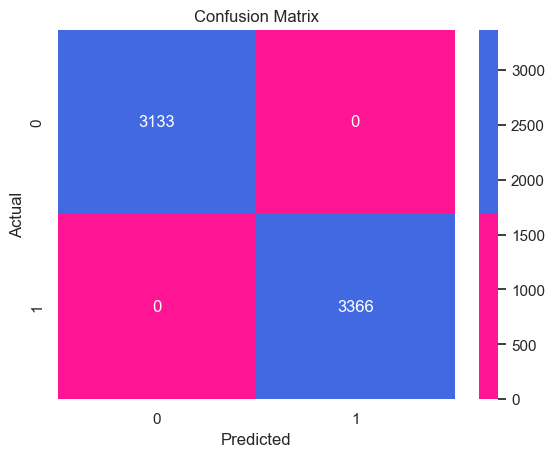

In [339]:
plot_confusion_matrix(cm_baseline_train)

In [340]:
cm_baseline_test = confusion_matrix(y_test, test_pred_log_reg)

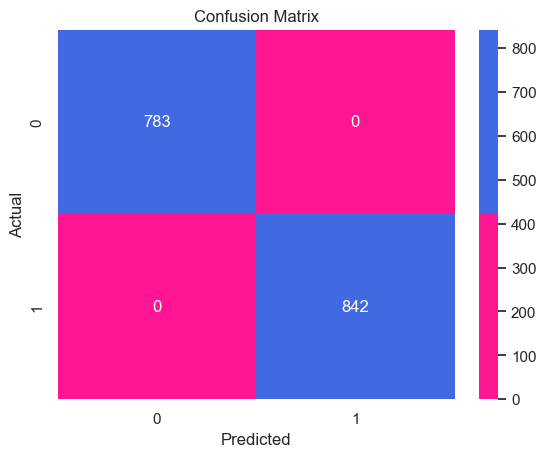

In [341]:
plot_confusion_matrix(cm_baseline_test)

Let's check the report on both training and test sets.

In [342]:
train_baseline_report = classification_report(y_train, train_pred_log_reg, output_dict=True)

In [343]:
pd.DataFrame(train_baseline_report).transpose()

,precision,recall,f1-score,support
0,1.0,1.0,1.0,3133.0
1,1.0,1.0,1.0,3366.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,6499.0
weighted avg,1.0,1.0,1.0,6499.0


In [344]:
test_baseline_report = classification_report(y_test, test_pred_log_reg, output_dict=True)

In [345]:
pd.DataFrame(test_baseline_report).transpose()

,precision,recall,f1-score,support
0,1.0,1.0,1.0,783.0
1,1.0,1.0,1.0,842.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1625.0
weighted avg,1.0,1.0,1.0,1625.0


Although there is nearly no difference between the training and test scores, bias influences class generalization while maintaining a relatively low variance. To improve the effectiveness of our Logistic Regression model, I'll employ Grid Search Cross Validation to optimize hyperparameters, aiming to enhance its generalization capacity.

In [346]:
log_reg_scores = cross_val_score(baseline_log_reg, X, y, cv=5)

print("Logistic Regression without hyperparams Cross-Validation Scores:", log_reg_scores)
print("Mean Accuracy:", log_reg_scores .mean())

Logistic Regression without hyperparams Cross-Validation Scores: [0.79938462 0.99938462 0.95015385 1.         0.62438424]
Mean Accuracy: 0.8746614626752558


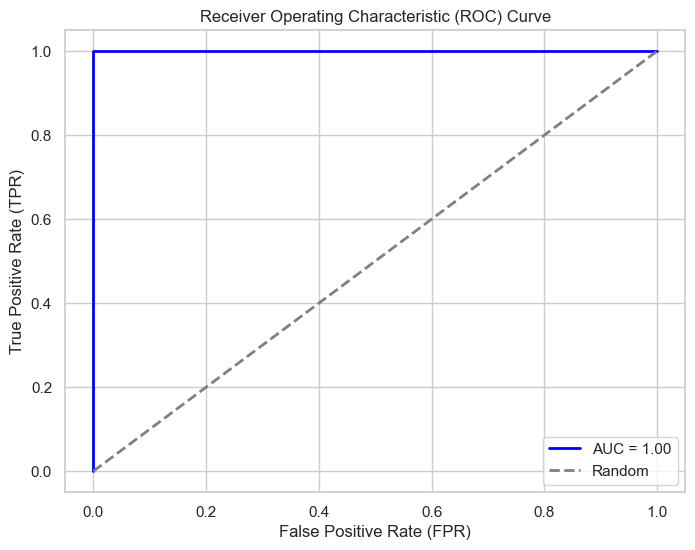

In [347]:
y_scores = baseline_log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()

I used GridSearchCV to find the optimal value for the "C" parameter in Logistic Regression, aiming to enhance model performance. Adjusting "C" through GridSearchCV allowed the model to strike the right balance between bias and variance, enhancing its capability to generalize to new, unseen data.

In [348]:
param_grid_c = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [349]:
grid_search_log_reg = GridSearchCV(LogisticRegression(max_iter=200), param_grid_c, cv=5)
grid_search_log_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [350]:
best_C = grid_search_log_reg.best_params_['C']

In [351]:
best_C

10

In [352]:
grid_search_log_reg.best_score_

1.0

Let's check the csv_results_ from GridSearchCV.

In [353]:
grid_search_log_reg.cv_results_

{'mean_fit_time': array([0.03124981, 0.04068069, 0.06581125, 0.12198873, 0.18419595,
        0.20804949, 0.1986412 ]),
 'std_fit_time': array([4.17171201e-06, 7.70191247e-03, 6.16611979e-03, 6.26572784e-03,
        2.12604978e-02, 1.53100323e-02, 6.92275514e-03]),
 'mean_score_time': array([0.        , 0.00312748, 0.00925589, 0.        , 0.00625062,
        0.00937915, 0.00625   ]),
 'std_score_time': array([0.        , 0.00625496, 0.0075607 , 0.        , 0.00765541,
        0.00765804, 0.00765466]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'split0_test_score': array([0.89615385, 0.96923077, 0.97769231, 0.99923077, 1.        ,
        1.        , 1.        ]),
 'split1_test_score': array([0.92153846, 0.96615385, 0.98384615, 0.9984

In [354]:
optimized_log_reg = LogisticRegression(C=best_C, max_iter=200)

In [355]:
optimized_log_reg.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=200)

In [356]:
optimized_log_reg.score(X_test, y_test)

1.0

In [357]:
train_pred_optimized_log_reg = optimized_log_reg.predict(X_train)
test_pred_optimized_log_reg = optimized_log_reg.predict(X_test)

In [358]:
train_accuracy_optimized_log_reg = accuracy_score(y_train, train_pred_optimized_log_reg)

In [359]:
train_accuracy_optimized_log_reg

1.0

In [360]:
test_accuracy_optimized_log_reg = accuracy_score(y_test, test_pred_optimized_log_reg)

In [361]:
test_accuracy_optimized_log_reg

1.0

In [362]:
cm_optimized_train = confusion_matrix(y_train, train_pred_optimized_log_reg)

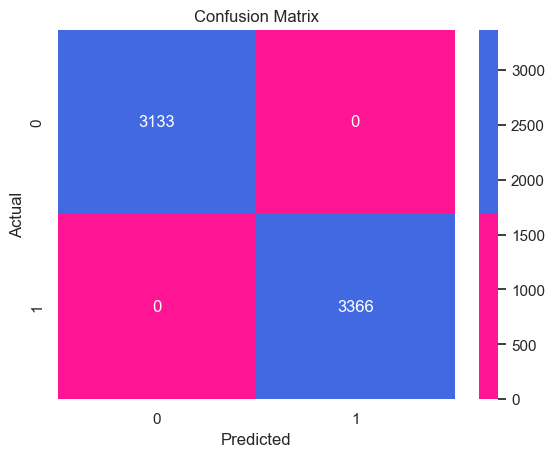

In [363]:
plot_confusion_matrix(cm_optimized_train)

In [364]:
cm_optimized_test = confusion_matrix(y_test, test_pred_optimized_log_reg)

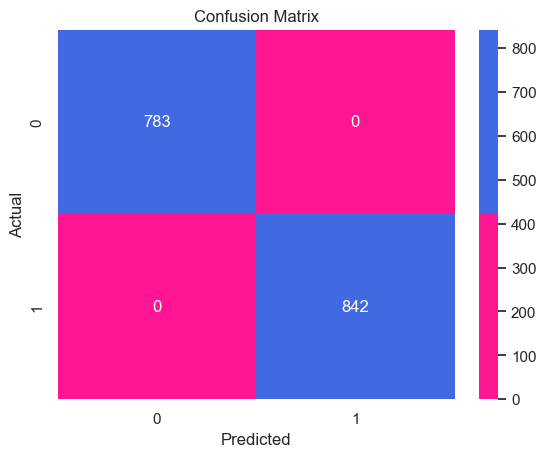

In [365]:
plot_confusion_matrix(cm_optimized_test)

In [366]:
train_optimized_report = classification_report(y_train, train_pred_optimized_log_reg, output_dict=True)

In [367]:
pd.DataFrame(train_optimized_report).transpose()

,precision,recall,f1-score,support
0,1.0,1.0,1.0,3133.0
1,1.0,1.0,1.0,3366.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,6499.0
weighted avg,1.0,1.0,1.0,6499.0


In [368]:
test_optimized_report = classification_report(y_test, test_pred_optimized_log_reg, output_dict=True)

In [369]:
pd.DataFrame(test_optimized_report).transpose()

,precision,recall,f1-score,support
0,1.0,1.0,1.0,783.0
1,1.0,1.0,1.0,842.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1625.0
weighted avg,1.0,1.0,1.0,1625.0


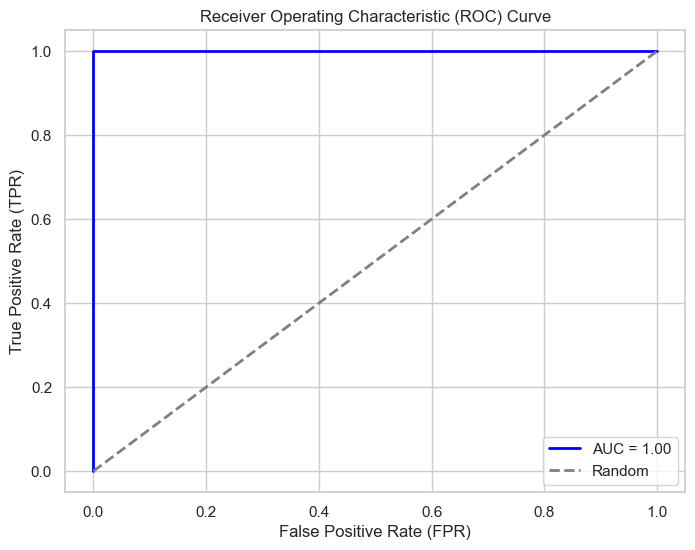

In [370]:
y_scores = optimized_log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
# plt.savefig(f'roc_curve_optimized.png')
plt.show()

In [371]:
optimized_log_reg_scores = cross_val_score(optimized_log_reg, X, y, cv=5)

print("Logistic Regression with C Cross-Validation Scores:", optimized_log_reg_scores)
print("Mean Accuracy:", optimized_log_reg_scores.mean())

Logistic Regression with C Cross-Validation Scores: [0.84123077 1.         0.99384615 1.         0.65086207]
Mean Accuracy: 0.8971877984084881


The accuracy scores range between approximately 0.65 and 1.0, indicating variability in model performance across different folds of the data.
So, let's try to fit another algorithm.

## DecisionTree

Utilizing a Decision Tree for binary classification offers interpretability and ease of visualization, aiding in understanding the decision-making process. As emphasized in lectures, Decision Trees are advantageous for handling non-linear relationships between features and the target variable, allowing for flexible modeling without assuming linear correlations, thus capturing complex decision boundaries more effectively than linear models. Additionally, Decision Trees are less sensitive to outliers and feature scaling, making them suitable for datasets with varying scales or irregularities.

In [372]:
param_tree_cls = {
    'max_depth': randint(2, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

In [373]:
baseline_tree_cls = DecisionTreeClassifier(random_state=42)

In [374]:
random_search = RandomizedSearchCV(baseline_tree_cls, param_distributions=param_tree_cls, n_iter=20,
                                   cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025FF7276E60>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025FF7276F50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025FF78D6980>},
                   random_state=42, scoring='accuracy')

In [375]:
best_params = random_search.best_params_

In [376]:
best_params

{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 16}

The best result seems to be with (max_depth=8, max_features=4, min_samples_leaf=16)

In [377]:
random_search.best_score_

1.0

In [378]:
best_tree = random_search.best_estimator_

In [379]:
best_tree

DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=16,
                       random_state=42)

In [380]:
y_pred_best_tree = best_tree.predict(X_test)
test_accuracy_best_tree = accuracy_score(y_test, y_pred_best_tree)

In [381]:
test_accuracy_best_tree

1.0

In [382]:
cm_best_tree_test = confusion_matrix(y_test, y_pred_best_tree)

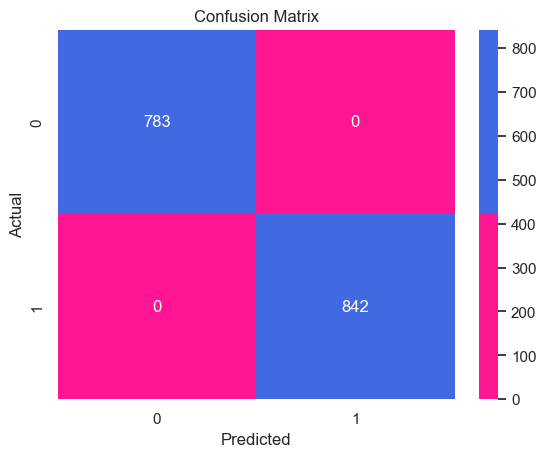

In [383]:
plot_confusion_matrix(cm_best_tree_test)

In [384]:
test_best_tree_cls_report = classification_report(y_test, y_pred_best_tree, output_dict=True)

In [385]:
pd.DataFrame(test_best_tree_cls_report).transpose()

,precision,recall,f1-score,support
0,1.0,1.0,1.0,783.0
1,1.0,1.0,1.0,842.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1625.0
weighted avg,1.0,1.0,1.0,1625.0


In [386]:
def calculate_feature_importance(tree, x):
    importance = tree.feature_importances_
    
    feature_importance_df = pd.DataFrame({'Feature Names': x.columns, 'Importance': importance})
    return feature_importance_df[feature_importance_df['Importance'] > 0].sort_values(by='Importance', ascending=False)

In [387]:
calculate_feature_importance(best_tree, X)

,Feature Names,Importance
17,odor_n,0.615015
34,stalk-root_c,0.181902
45,stalk-surface-below-ring_y,0.097189
67,spore-print-color_Others,0.025118
32,stalk-shape_t,0.019793
81,habitat_m,0.017364
78,habitat_d,0.015625
57,stalk-color-below-ring_w,0.013829
21,gill-size_n,0.005929
0,bruises,0.003941


Let's see the feature importances on the best estimator. It seem 'odor_n' is the most important feature! The value of 0.6173 indicates the importance of the feature relative to the other features used in the model. Possible Overfitting: In some cases, a single feature having very high importance might indicate overfitting, especially if other features' importance is considerably lower (like 'habitat_l'). This situation should be investigated further to ensure model generalization.

In [388]:
random_search.cv_results_

{'mean_fit_time': array([0.04696283, 0.03786182, 0.03039951, 0.03468862, 0.04053154,
        0.03437338, 0.03750043, 0.03777571, 0.0410768 , 0.03124623,
        0.02844334, 0.02898636, 0.0292345 , 0.01966081, 0.01902313,
        0.01563096, 0.02187524, 0.01562724, 0.02187395, 0.01561689]),
 'std_fit_time': array([1.68291337e-04, 7.79408989e-03, 1.01751729e-02, 6.12609185e-03,
        7.35528841e-03, 6.24378255e-03, 7.65208145e-03, 7.21098299e-03,
        7.41301501e-03, 9.30675711e-06, 1.16222697e-02, 3.02900196e-03,
        8.63741346e-03, 7.68358557e-03, 6.14368384e-03, 1.13563352e-05,
        7.65232682e-03, 1.02643006e-05, 7.65307913e-03, 5.84003864e-06]),
 'mean_score_time': array([0.        , 0.00312386, 0.01022592, 0.00965333, 0.00938535,
        0.00938282, 0.0034338 , 0.00327168, 0.        , 0.        ,
        0.00669074, 0.        , 0.00447083, 0.00513844, 0.00312781,
        0.00312343, 0.        , 0.00937638, 0.00312481, 0.        ]),
 'std_score_time': array([0.        , 

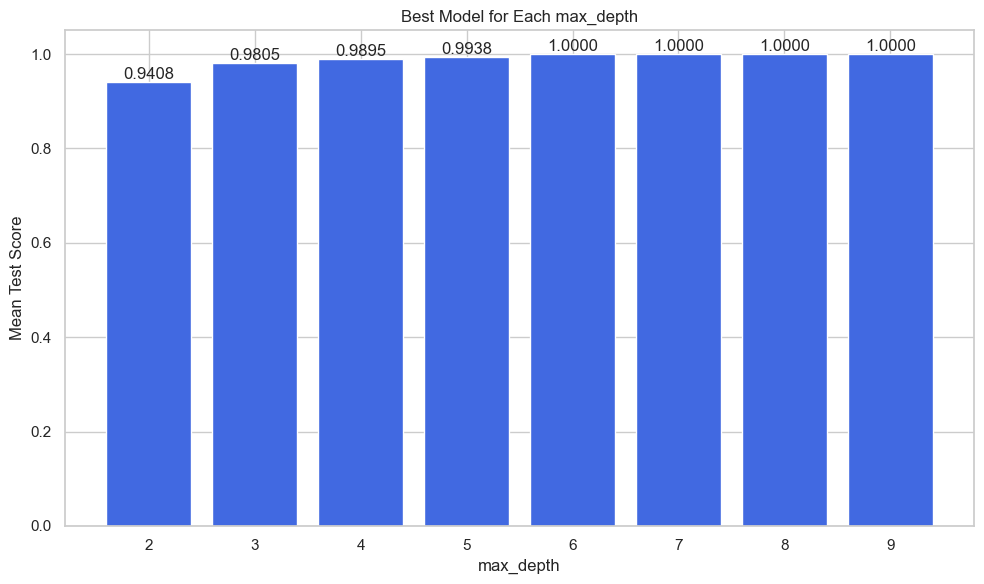

In [389]:
results = random_search.cv_results_

max_depth_values = results['param_max_depth']
mean_test_scores = results['mean_test_score']
params = results['params']

best_scores = {}
for depth, score, param in zip(max_depth_values, mean_test_scores, params):
    if depth not in best_scores or score > best_scores[depth][0]:
        best_scores[depth] = (score, param)

depths = list(range(2, 10))
scores = [best_scores.get(depth, (None, None))[0] for depth in depths]

plt.figure(figsize=(10, 6))
plt.bar(depths, scores, color='#4169E1')
plt.title("Best Model for Each max_depth")
plt.xlabel('max_depth')
plt.ylabel('Mean Test Score')
for i, score in enumerate(scores):
    if score is not None:
        plt.text(depths[i], score, f"{score:.4f}", ha='center', va='bottom')

plt.xticks(depths)
plt.tight_layout()
plt.show()

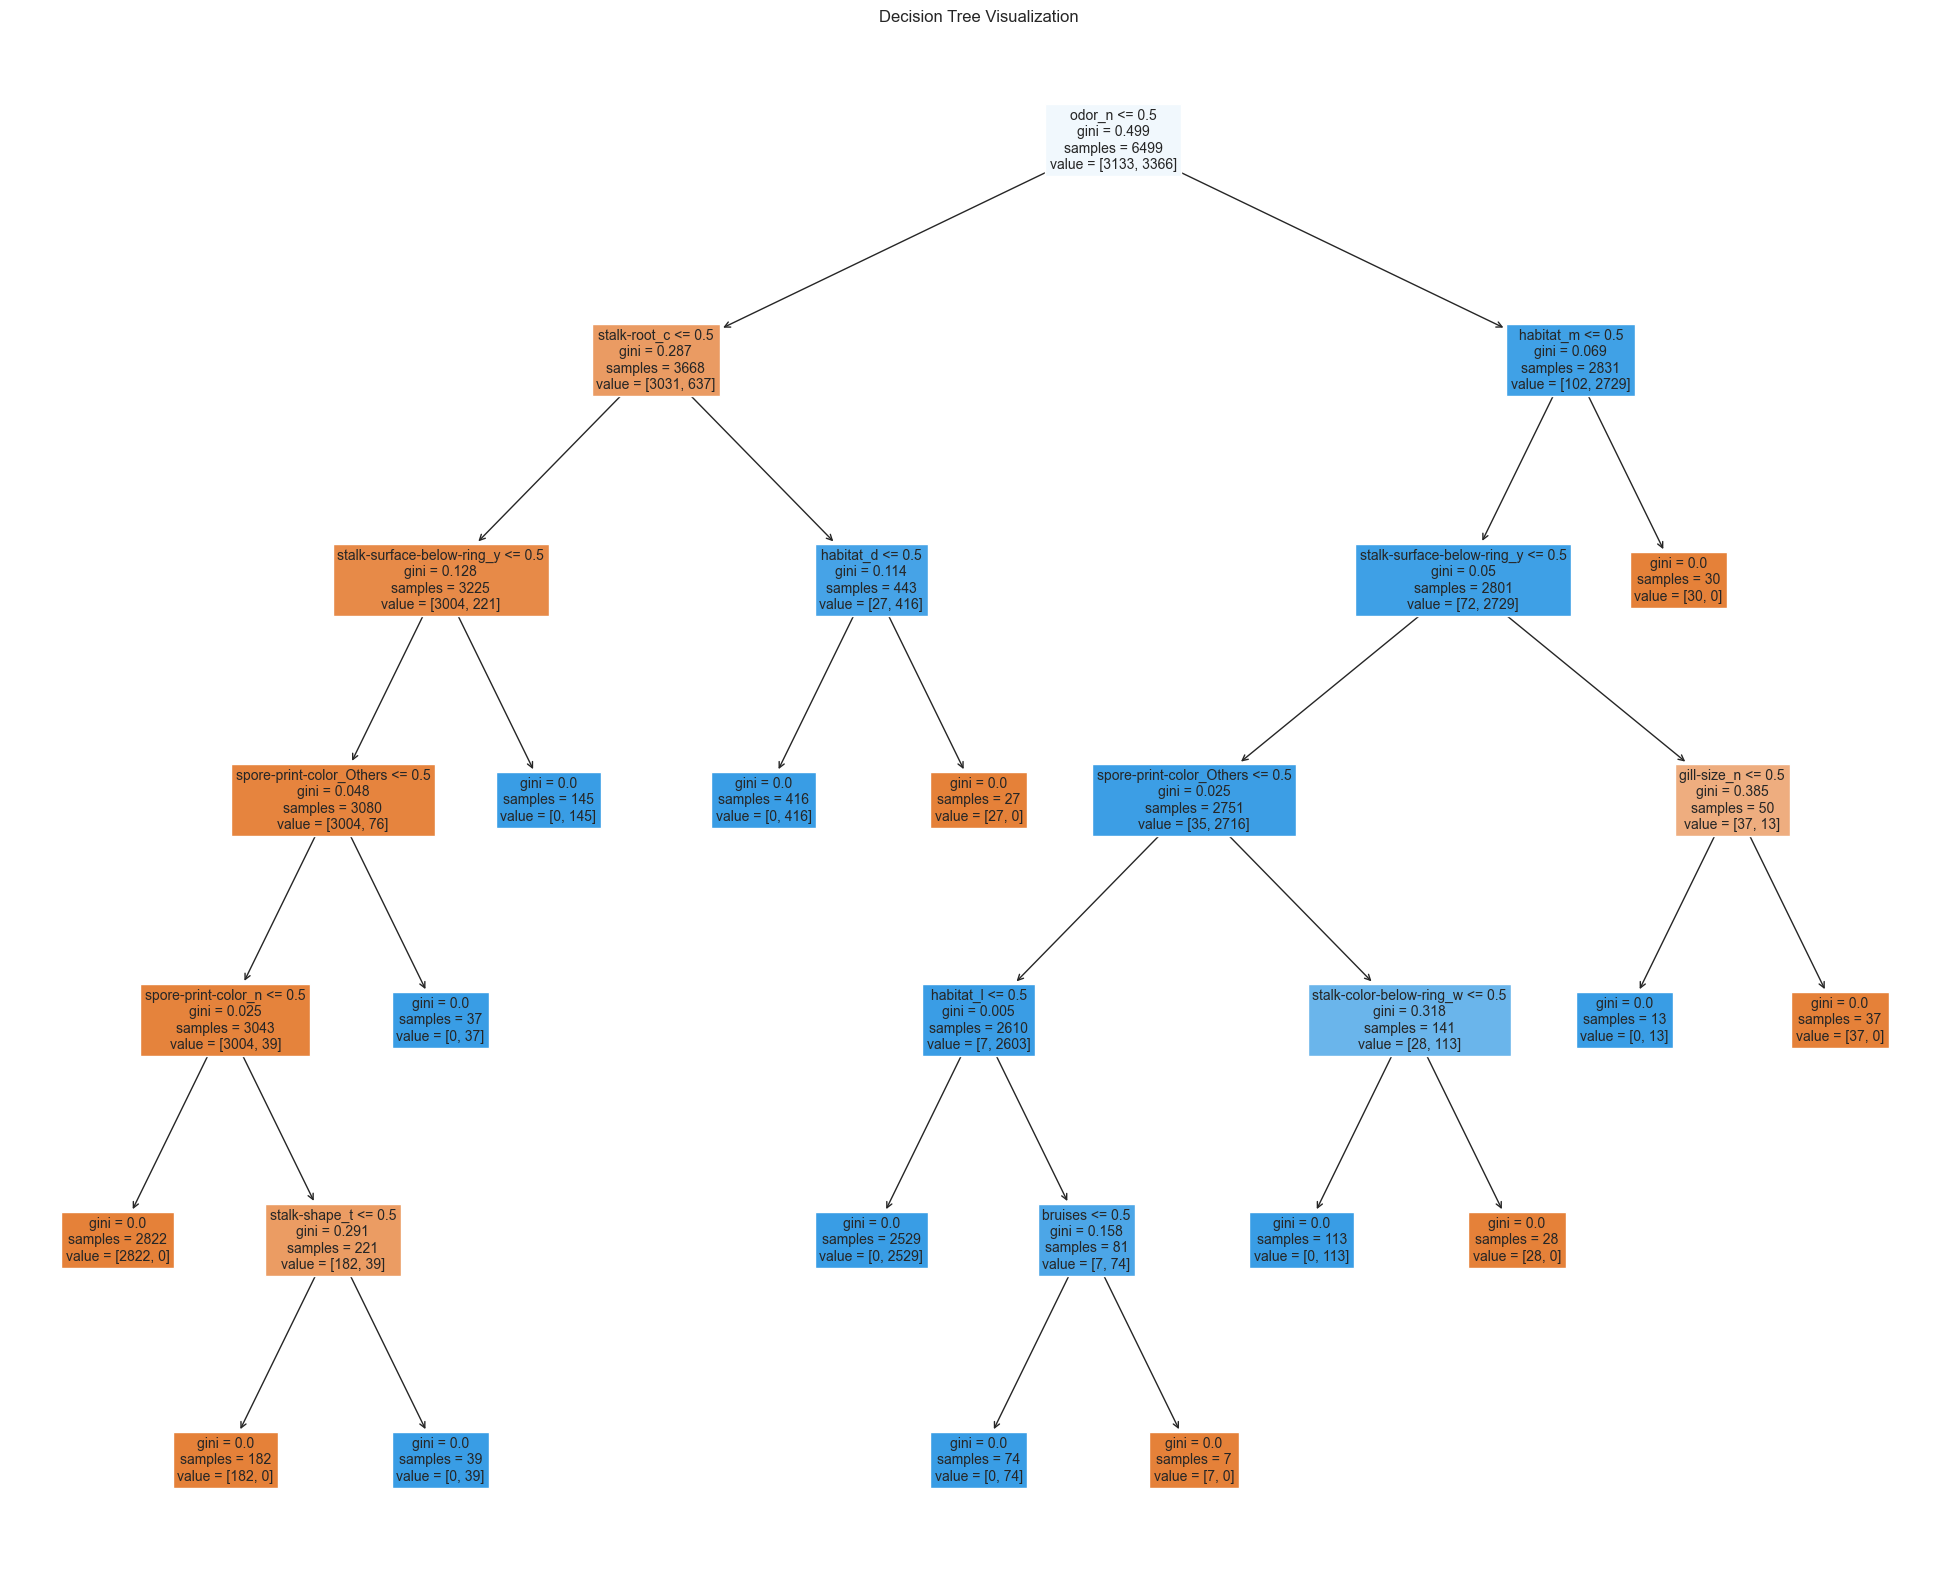

In [390]:
plt.figure(figsize=(25, 20))
plot_tree(best_tree, filled=True, feature_names=X.columns)
plt.title("Decision Tree Visualization")
plt.show()

## RandomForestClassifier

From [https://scikit-learn.org/](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html):
> A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to
> improve the predictive accuracy and control over-fitting

This algorithm will create many Decision Trees and the output class will be the one selected by the most trees.

In [391]:
param_grid_random_forest_cls = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [2, 5, 10, 15], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt']
}

In [392]:
baseline_random_forest_cls = RandomForestClassifier()

In [393]:
grid_search = GridSearchCV(estimator=baseline_random_forest_cls, param_grid=param_grid_random_forest_cls, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10, 15],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [394]:
best_params_random_forest_cls = grid_search.best_params_

In [395]:
best_params_random_forest_cls

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [396]:
best_random_forest_cls = RandomForestClassifier(**best_params_random_forest_cls)
best_random_forest_cls.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2')

In [397]:
y_pred = best_random_forest_cls.predict(X_test)

In [398]:
test_accuracy_best_random_forest_cls = accuracy_score(y_test, y_pred)

In [399]:
test_accuracy_best_random_forest_cls

1.0

In [400]:
cm_best_random_forest_cls_test = confusion_matrix(y_test, y_pred)

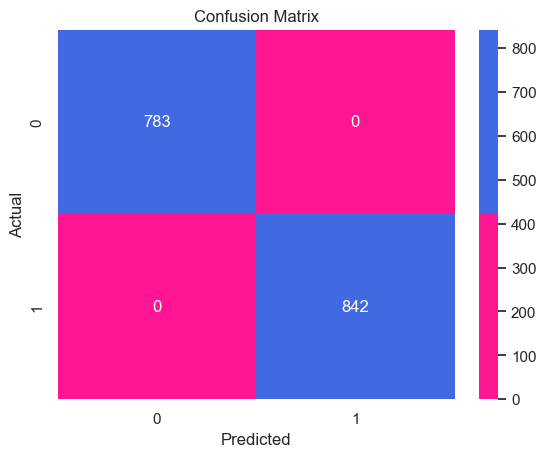

In [401]:
plot_confusion_matrix(cm_best_random_forest_cls_test)

In [402]:
test_best_random_forest_report = classification_report(y_test, y_pred, output_dict=True)

In [403]:
pd.DataFrame(test_best_random_forest_report).transpose()

,precision,recall,f1-score,support
0,1.0,1.0,1.0,783.0
1,1.0,1.0,1.0,842.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1625.0
weighted avg,1.0,1.0,1.0,1625.0


In [404]:
calculate_feature_importance(best_random_forest_cls, X)

,Feature Names,Importance
17,odor_n,0.137330
16,odor_f,0.078778
39,stalk-surface-above-ring_k,0.071806
20,gill-size_b,0.063265
21,gill-size_n,0.054331
...,...,...
48,stalk-color-above-ring_g,0.000370
29,gill-color_u,0.000360
61,veil-color_y,0.000246
59,veil-color_o,0.000103


It seems once more that 'odor_n' is the most important feature! Let's temporarily remove the 'odor' feature and test the RandomForestClassifier again.

In [461]:
X_train_without_odor = X_train.loc[:, ~X_train.columns.str.contains('odor')]

In [462]:
X_test_without_odor = X_test.loc[:, ~X_test.columns.str.contains('odor')]

In [464]:
random_forest_cls = RandomForestClassifier()
random_forest_cls.fit(X_train_without_odor, y_train)

RandomForestClassifier()

In [465]:
y_pred_random_forest_cls = random_forest_cls.predict(X_test_without_odor)

In [466]:
test_accuracy_random_forest_cls = accuracy_score(y_test, y_pred_random_forest_cls)

In [467]:
test_accuracy_random_forest_cls

1.0

In [468]:
calculate_feature_importance(random_forest_cls, X_train_without_odor)

,Feature Names,Importance
16,gill-size_n,0.080065
15,gill-size_b,0.077875
63,spore-print-color_h,0.073983
34,stalk-surface-above-ring_k,0.069276
38,stalk-surface-below-ring_k,0.051031
...,...,...
21,gill-color_k,0.000337
4,cap-shape_k,0.000290
56,veil-color_y,0.000231
36,stalk-surface-above-ring_y,0.000202


The 'accuracy_score' remains at 1, yet there isn't a significant difference in feature importances. Let's proceed with testing another algorithm.

## LGBMClassifier

LightGBM uses the gradient boosting framework, constructing ensemble models sequentially, where each new model corrects errors made by the previous ones.

In [475]:
param_grid_lgbm_cls = {
    'num_leaves': [10, 15, 20],
    'learning_rate': [0.05, 0.1, 0.2]
}

In [476]:
lgbm_classifier = LGBMClassifier(force_row_wise=True)

In [477]:
lgbm_classifier.set_params(verbosity=-1)

LGBMClassifier(force_row_wise=True, verbosity=-1)

In [478]:
grid_search_lgbm_cls = GridSearchCV(estimator=lgbm_classifier, param_grid=param_grid_lgbm_cls, cv=3, scoring='accuracy')
grid_search_lgbm_cls.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LGBMClassifier(force_row_wise=True, verbosity=-1),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'num_leaves': [10, 15, 20]},
             scoring='accuracy')

In [479]:
best_params_lgbm_cls = grid_search_lgbm_cls.best_params_

In [480]:
best_params_lgbm_cls

{'learning_rate': 0.05, 'num_leaves': 15}

In [481]:
best_model_lgbm_cls = grid_search_lgbm_cls.best_estimator_

In [482]:
best_model_lgbm_cls

LGBMClassifier(force_row_wise=True, learning_rate=0.05, num_leaves=15,
               verbosity=-1)

In [483]:
y_pred_lgbm_cls = best_model_lgbm_cls.predict(X_test)
accuracy_score(y_test, y_pred_lgbm_cls)

1.0

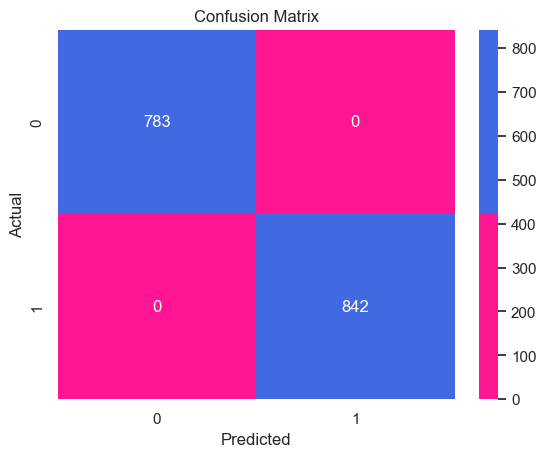

In [484]:
cm_lgbm_cls = confusion_matrix(y_test, y_pred_lgbm_cls)
plot_confusion_matrix(cm_lgbm_cls)

In [485]:
test_lgbm_cls_report = classification_report(y_test, y_pred_lgbm_cls, output_dict=True)
pd.DataFrame(test_best_tree_cls_report).transpose()

,precision,recall,f1-score,support
0,1.0,1.0,1.0,783.0
1,1.0,1.0,1.0,842.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1625.0
weighted avg,1.0,1.0,1.0,1625.0


In [491]:
calculate_feature_importance(best_model_lgbm_cls, X)

,Feature Names,Importance
0,bruises,217
67,spore-print-color_Others,200
17,odor_n,100
70,spore-print-color_n,100
34,stalk-root_c,100
37,stalk-root_r,100
81,habitat_m,100
31,stalk-shape_e,96
14,cap-color_y,74
39,stalk-surface-above-ring_k,73


Let's see the feature importances. It seem 'bruises' is the most important feature! The feature importance values in LightGBM are typically based on different calculations or metrics, such as 'split' or 'gain'. These metrics represent the number of times a feature is used in the model (split) or the improvement in accuracy resulting from using that feature in a tree (gain).

In [487]:
y_pred_proba_lgbm_cls = best_model_lgbm_cls.predict_proba(X_test)
log_loss_lgbm_cls = log_loss(y_test, y_pred_proba_lgbm_cls)
print(f"Log Loss: {log_loss_lgbm_cls:.4f}")

Log Loss: 0.0034


I think a log_loss value of 0.0034 indicates very accurate predictions from the LightGBM model. Let's test with another gradient-boosting algorithm.

## CatBoostClassifier

From [https://www.linkedin.com/](https://www.linkedin.com/pulse/boosting-techniques-battle-catboost-vs-xgboost-lightgbm-uttam-kumar)
> CatBoost is a powerful open-source gradient boosting library developed by Yandex. It is designed to handle categorical features natively and provides > state-of-the-art performance on many tabular data problems.One of the key features of CatBoost is that it can handle categorical features 
> automatically. It can learn the best way to convert categorical features into numerical values during training, without requiring manual encoding. 
> This is achieved using a technique called ordered boosting, which learns the optimal ordering of categorical values based on their relationship to 
> the target variable.

In [492]:
param_grid_cat_boost = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 300],
}

In [493]:
catboost = CatBoostClassifier()

In [494]:
grid_search_cat_boost = GridSearchCV(estimator=catboost, param_grid=param_grid_cat_boost, cv=3, scoring='accuracy')
grid_search_cat_boost.fit(X_train, y_train)

0:	learn: 0.6705794	total: 4.34ms	remaining: 429ms
1:	learn: 0.6481000	total: 9.02ms	remaining: 442ms
2:	learn: 0.6192718	total: 14.5ms	remaining: 468ms
3:	learn: 0.5986639	total: 19.8ms	remaining: 474ms
4:	learn: 0.5780831	total: 24ms	remaining: 457ms
5:	learn: 0.5585241	total: 27.3ms	remaining: 428ms
6:	learn: 0.5360987	total: 31.2ms	remaining: 414ms
7:	learn: 0.5097583	total: 35.4ms	remaining: 407ms
8:	learn: 0.4856182	total: 39.6ms	remaining: 400ms
9:	learn: 0.4632790	total: 43.8ms	remaining: 395ms
10:	learn: 0.4449826	total: 48.2ms	remaining: 390ms
11:	learn: 0.4282856	total: 52.3ms	remaining: 384ms
12:	learn: 0.4172160	total: 56.1ms	remaining: 376ms
13:	learn: 0.4069139	total: 59.2ms	remaining: 363ms
14:	learn: 0.3884361	total: 63.7ms	remaining: 361ms
15:	learn: 0.3708528	total: 67.6ms	remaining: 355ms
16:	learn: 0.3562381	total: 71.5ms	remaining: 349ms
17:	learn: 0.3431068	total: 75ms	remaining: 342ms
18:	learn: 0.3270238	total: 79ms	remaining: 337ms
19:	learn: 0.3156986	total: 

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000025FF3BDD9F0>,
             param_grid={'depth': [6, 8, 10], 'iterations': [100, 200, 300],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='accuracy')

In [495]:
best_params_cat_boost = grid_search_cat_boost.best_params_

In [496]:
best_params_cat_boost

{'depth': 6, 'iterations': 100, 'learning_rate': 0.05}

In [497]:
best_score_cat_boost = grid_search_cat_boost.best_score_

In [498]:
best_score_cat_boost

1.0

In [499]:
best_cat_boost = grid_search_cat_boost.best_estimator_

In [501]:
y_pred_cat_boost = best_cat_boost.predict(X_test)
accuracy_score(y_test, y_pred_cat_boost)

1.0

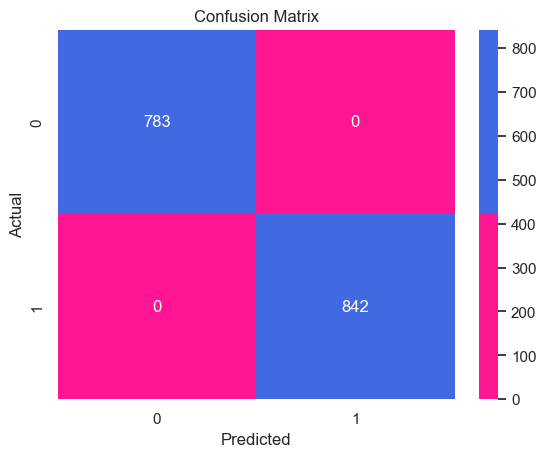

In [502]:
cm_cat_boost = confusion_matrix(y_test, y_pred_cat_boost)
plot_confusion_matrix(cm_cat_boost)

In [503]:
test_cat_boost_cls_report = classification_report(y_test, y_pred_cat_boost, output_dict=True)
pd.DataFrame(test_cat_boost_cls_report).transpose()

,precision,recall,f1-score,support
0,1.0,1.0,1.0,783.0
1,1.0,1.0,1.0,842.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1625.0
weighted avg,1.0,1.0,1.0,1625.0


In [504]:
calculate_feature_importance(best_cat_boost, X)

,Feature Names,Importance
17,odor_n,49.810221
34,stalk-root_c,6.262091
0,bruises,5.949918
21,gill-size_n,3.866825
16,odor_f,3.797177
45,stalk-surface-below-ring_y,3.735430
33,stalk-root_b,2.930200
67,spore-print-color_Others,2.477736
35,stalk-root_e,2.357738
20,gill-size_b,2.123088


Let's examine the feature importances. It appears that 'odor_n' is once again the most important feature, as observed in DecisionTree and RandomForest.

In [505]:
y_pred_proba_best_cat_boost = best_cat_boost.predict_proba(X_test)
log_loss_cat_boost = log_loss(y_test, y_pred_proba_best_cat_boost)
print(f"Log Loss: {log_loss_lgbm_cls:.4f}")

Log Loss: 0.0034


In [506]:
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)

best_cat_boost.fit(train_pool, eval_set=test_pool)
res = best_cat_boost.calc_feature_statistics(train_pool, test_pool, feature=17, plot_file="best_cat_boost_odr_n.html")

0:	learn: 0.5850321	test: 0.5864997	best: 0.5864997 (0)	total: 6ms	remaining: 594ms
1:	learn: 0.4667146	test: 0.4682251	best: 0.4682251 (1)	total: 11.6ms	remaining: 567ms
2:	learn: 0.3800973	test: 0.3812078	best: 0.3812078 (2)	total: 16.2ms	remaining: 524ms
3:	learn: 0.3248394	test: 0.3256437	best: 0.3256437 (3)	total: 20.8ms	remaining: 500ms
4:	learn: 0.2698653	test: 0.2704736	best: 0.2704736 (4)	total: 25.4ms	remaining: 482ms
5:	learn: 0.2140322	test: 0.2141736	best: 0.2141736 (5)	total: 29.8ms	remaining: 467ms
6:	learn: 0.1715156	test: 0.1709806	best: 0.1709806 (6)	total: 34.4ms	remaining: 457ms
7:	learn: 0.1420972	test: 0.1413536	best: 0.1413536 (7)	total: 39.1ms	remaining: 449ms
8:	learn: 0.1147894	test: 0.1138477	best: 0.1138477 (8)	total: 44.3ms	remaining: 448ms
9:	learn: 0.0975769	test: 0.0964983	best: 0.0964983 (9)	total: 49.4ms	remaining: 444ms
10:	learn: 0.0838956	test: 0.0826041	best: 0.0826041 (10)	total: 54.6ms	remaining: 442ms
11:	learn: 0.0730641	test: 0.0719191	best: 0

## SVC

In [514]:
param_grid_svm_cls = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 10]
}

In [515]:
svm_classifier = SVC()

In [516]:
grid_search_svm_cls = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm_cls, cv=5, scoring='accuracy')
grid_search_svm_cls.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [517]:
best_params_svm_cls = grid_search_svm_cls.best_params_

In [518]:
best_params_svm_cls 

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

In [519]:
best_svm_cls = grid_search_svm_cls.best_estimator_

In [520]:
best_svm_cls

SVC(C=0.1, gamma=0.1, kernel='poly')

In [521]:
y_pred_best_svm_cls = best_svm_cls.predict(X_test)
accuracy_best_svm_cls = accuracy_score(y_test, y_pred_best_svm_cls)

In [522]:
accuracy_best_svm_cls

1.0

In [524]:
best_svm_cls.intercept_

array([-0.04036322])

In [525]:
best_svm_cls.support_vectors_

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

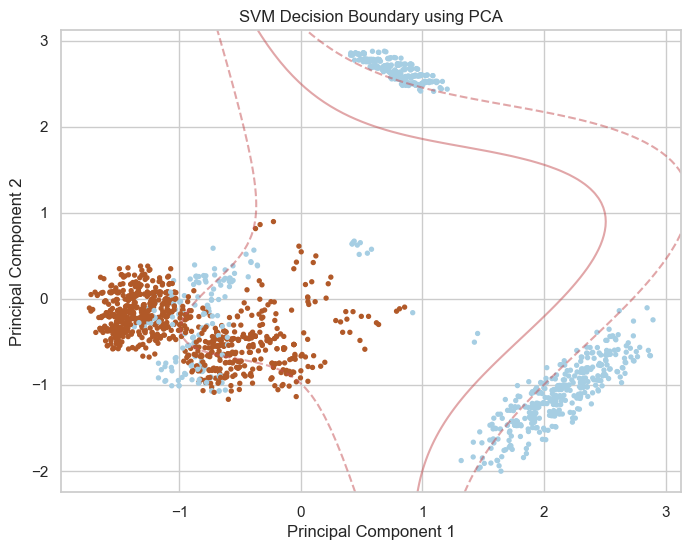

In [526]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

svm = SVC(kernel='poly', C=0.1, gamma=0.1)
svm.fit(X_train_pca, y_train)

X_test_pca = pca.transform(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.Paired, s=8)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contour(xx, yy, Z, colors='r', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary using PCA')
plt.show()

In [527]:
nu_values = [0.1, 0.3, 0.5, 0.7]

for nu in nu_values:
    nu_svm = NuSVC(kernel='poly', nu=nu)
    nu_svm.fit(X_train, y_train)
    
    train_accuracy = nu_svm.score(X_train, y_train)
    test_accuracy = nu_svm.score(X_test, y_test)
    
    print(f"NuSVC with nu={nu}: Train accuracy - {train_accuracy:.4f}, Test accuracy - {test_accuracy:.4f}")

NuSVC with nu=0.1: Train accuracy - 0.9994, Test accuracy - 1.0000
NuSVC with nu=0.3: Train accuracy - 0.9772, Test accuracy - 0.9785
NuSVC with nu=0.5: Train accuracy - 0.9595, Test accuracy - 0.9698
NuSVC with nu=0.7: Train accuracy - 0.9175, Test accuracy - 0.9286


In [528]:
param_grid_nu_svc = {
    'nu': [0.1, 0.3, 0.5, 0.7],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]
}

In [529]:
nusvm = NuSVC()

In [530]:
grid_search_nu_svc = GridSearchCV(nusvm, param_grid_nu_svc, cv=5)
grid_search_nu_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=NuSVC(),
             param_grid={'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'nu': [0.1, 0.3, 0.5, 0.7]})

In [531]:
grid_search_nu_svc.best_params_

{'degree': 4, 'kernel': 'poly', 'nu': 0.1}

In [532]:
grid_search_nu_svc.best_score_

0.9993844969503168